In [1]:
import pandas as pd

df_jugadores = pd.read_csv("jugadores_cebollitas.csv")
print(df_jugadores.columns)

Index(['jugador_id', 'nombre', 'posición', 'edad', 'partidos_jugados', 'goles',
       'asistencias', 'pases_completados (%)', 'tiros_al_arco',
       'precisión_tiros (%)', 'minutos_jugados'],
      dtype='object')


In [2]:
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X)

c:\Users\rbadillo\AppData\Local\anaconda3\envs\python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rbadillo\AppData\Local\anaconda3\envs\python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\rbadillo\AppData\Local\anaconda3\envs\python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rbadillo\AppData\Local\anaconda3\envs\python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preex

In [3]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
cluster_profiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(cluster_profiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


C:\Users\rbadillo\AppData\Local\Temp\ipykernel_57496\3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


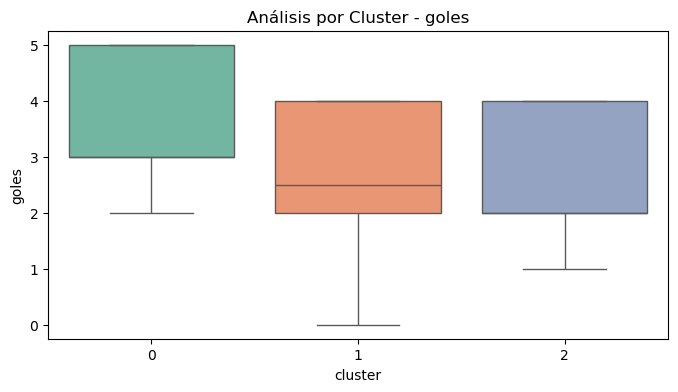

C:\Users\rbadillo\AppData\Local\Temp\ipykernel_57496\3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


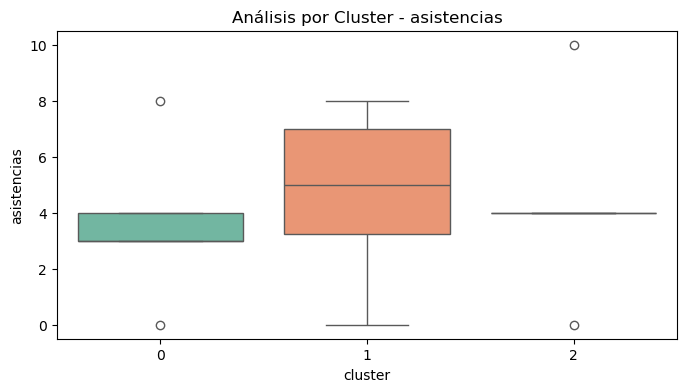

C:\Users\rbadillo\AppData\Local\Temp\ipykernel_57496\3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


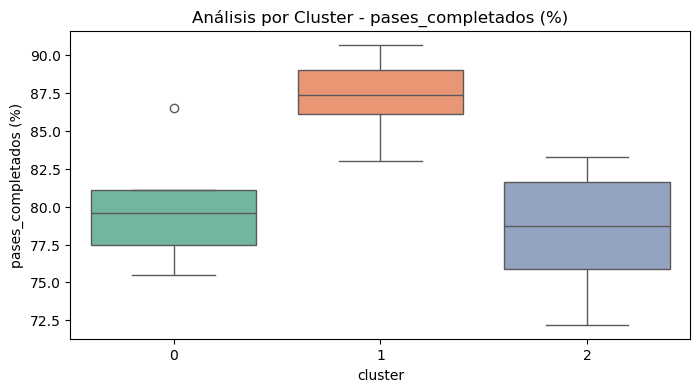

C:\Users\rbadillo\AppData\Local\Temp\ipykernel_57496\3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


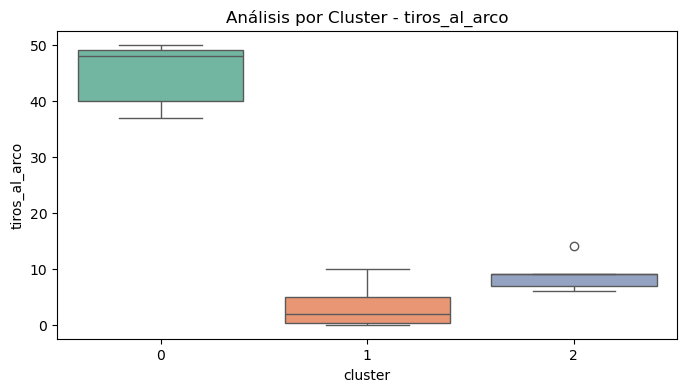

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


features = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')
    plt.title(f'Análisis por Cluster - {feature}')
    plt.show()

In [5]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown interactivo
cluster_selector = widgets.Dropdown(
    options=sorted(df_jugadores['cluster'].unique()),
    description='Cluster:'
)

# Función de despliegue
def mostrar_jugadores(cluster):
    jugadores = df_jugadores[df_jugadores['cluster'] == cluster]
    display(jugadores[['nombre', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

# Activar widget
widgets.interactive(mostrar_jugadores, cluster=cluster_selector)

interactive(children=(Dropdown(description='Cluster:', options=(np.int32(0), np.int32(1), np.int32(2)), value=…